### Minha proposta de solução 

In [373]:
import pandas as pd

In [374]:
import numpy as np 

In [375]:
import math

In [376]:
import missingno

In [377]:
import statistics

In [378]:
from datetime import datetime

In [379]:
lista_labels_valores_ausentes= [['n/a', 'na', 'undefined' ]]

In [380]:
dataset = pd.read_csv('/Users/izadoraramos/Desktop/DataScienceAcademy/projeto4/dataset.csv')

In [381]:
dataset_copy = dataset 
dataset_copy

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000.0,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000.0,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000.0,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000.0,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [382]:
dataset_copy.shape

(45211, 19)

### Análise Exploratória

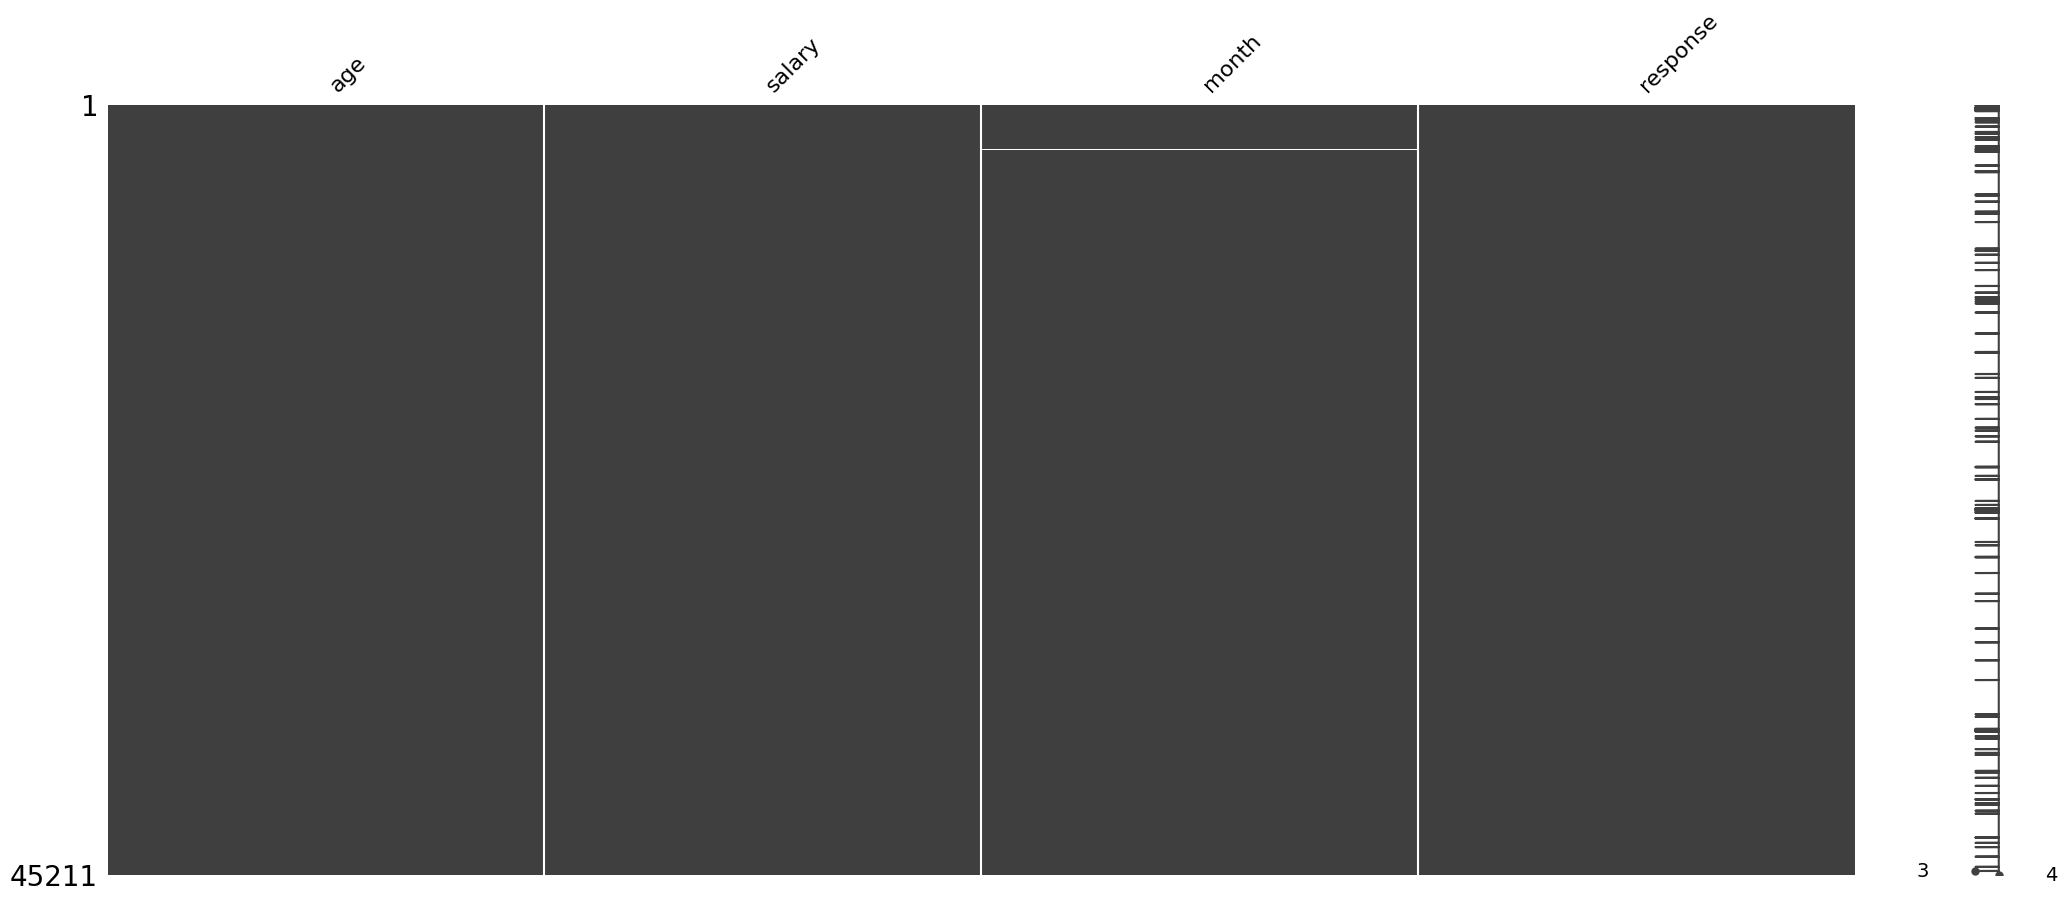

In [383]:
# Gera a visualização
#Para ver se existe um padrão nos valores ausentes

#DataFrame 
df_nan = pd.DataFrame(dataset_copy.isna().sum())

#Plot mapa de valores ausentes 
if dataset_copy.isna().any(axis=None):
    missingno.matrix(dataset_copy[df_nan[df_nan[0]>0].index])

In [384]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [385]:
# Calculando o percentual de valores ausentes 
TotalCells = np.product(dataset_copy.shape)
TotalMissingCount = (dataset_copy.isnull().sum()).sum()
round(((TotalMissingCount/TotalCells) * 100),4)


0.0147

In [386]:
# Criar tabela com os valores ausentes linha
def func_calc_percentual_valores_ausentes_coluna(df):
    # Total de valores ausentes
    mis_val = df.isnull().sum()

    # Porcentagem de valores ausentes
    mis_val_percent = 100 * mis_val / len(df)

    # Tipo de dado das colunas com valores ausentes
    mis_val_dtype = df.dtypes

    # Cria uma tabela com os resultados
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Renomear as colunas
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valores Ausentes', 1 : '% de Valores Ausentes', 2: 'Dtype'})

    # Classifica a tabela por porcentagem de valores ausentes de forma decrescente e remove colunas sem valores faltantes
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] != 0].sort_values('% de Valores Ausentes', ascending = False).round(2)

    # Print 
    print ("O dataset tem " + str(df.shape[1]) + " colunas.\n"
        "Encontrado: " + str(mis_val_table_ren_columns.shape[0]) + " colunas que têm valores ausentes.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return
    
    # Retorna o dataframe com informações ausentes
    return mis_val_table_ren_columns
    
    
df_missing = func_calc_percentual_valores_ausentes_coluna(df=dataset_copy)

O dataset tem 19 colunas.
Encontrado: 4 colunas que têm valores ausentes.


In [387]:
df_missing
# Como nenhuma coluna tem mais de 30% de valores ausentes não vou dropar nenhuma 

,Valores Ausentes,% de Valores Ausentes,Dtype
month,50,0.11,object
response,30,0.07,object
salary,26,0.06,float64
age,20,0.04,float64


In [388]:
# Verificar se seguem uma distribuição normal 
dataset_copy['salary'].skew(skipna=True)

0.13767483033054806

In [389]:
dataset_copy['age'].skew(skipna=True)

0.6850014193798112

- Se a assimetria estiver entre -0,5 e 0,5, os dados são bastante simétricos
- Se a assimetria estiver entre -1 e - 0,5 ou entre 0,5 e 1, os dados estão moderadamente inclinados
- Se a assimetria for menor que -1 ou maior que 1, os dados estão altamente enviesados
Visto que os dados da variável 'salary' tem skew de 0.13, são normais o suficiente para imputar a média nos valores ausentes. 
Já os dados da variável 'age por terem skew de 0.68 são moderadamente inclinados, então vou adotar a estratégia de imputar a mediana. 

In [390]:
median_salary = math.floor(dataset_copy['salary'].median())
median_salary

60000

In [391]:
#Preenchimento de valores ausentes em salary com a média 
nan_index = (dataset_copy[(dataset_copy['salary'].isna())]).index
nan_index

Int64Index([   35,    60,   169,   203,   230,   256,   282,   305,   321,
              331,   359, 23686, 23695, 23705, 23735, 23758, 23784, 23837,
            36631, 36652, 36665, 36688, 36717, 36739, 36771, 36797],
           dtype='int64')

In [392]:
# Imputação 
dataset_copy['salary'][nan_index] = median_salary

In [393]:
dataset_copy['salary'].unique()

array([100000.,  60000., 120000.,  20000.,      0.,  55000.,  50000.,
        70000.,   8000.,  16000.,   4000.])

In [394]:
#Sem nenhum NaN
dataset_copy['salary'].isna().notna().all()

True

In [395]:
median_age = dataset_copy['age'].median()
median_age

39.0

In [396]:
dataset_copy['age'].unique()

array([58., 44., 33., 47., 35., 28., 42., 43., 41., 29., 53., 57., 51.,
       45., 60., 56., 32., 25., 40., 39., 52., 46., 36., 49., 59., 37.,
       50., 54., 55., 48., 24., 38., 31., 30., 27., 34., 23., 26., nan,
       61., 22., 21., 20., 66., 62., 83., 75., 67., 70., 65., 68., 64.,
       69., 72., 71., 19., 76., 85., 63., 90., 82., 73., 74., 78., 80.,
       94., 79., 77., 86., 95., 81., 18., 89., 84., 87., 92., 93., 88.])

In [397]:
#Preenchimento de valores ausentes em salary com a média 
nan_index = dataset_copy[(dataset_copy['age'].isna())].index
nan_index

Int64Index([  161,  1021,  1585,  3943,  5675,  6873,  9692, 11653, 13417,
            14541, 17159, 19457, 23483, 23939, 26531, 35920, 40757, 40994,
            43573, 44974],
           dtype='int64')

In [398]:
len(nan_index)

20

In [399]:
# Imputação 
dataset_copy['age'][nan_index] = median_age

In [400]:
#Sem nenhum NaN
dataset_copy['age'].isna().notna().all()

True

In [401]:
func_calc_percentual_valores_ausentes_coluna(df=dataset_copy)

O dataset tem 19 colunas.
Encontrado: 2 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
month,50,0.11,object
response,30,0.07,object


In [402]:
dataset_copy['age'] = dataset_copy['age'].astype('int')

In [403]:
# Tratando os valores ausentes da variável month
dataset_copy['month'].unique()

array(['may, 2017', nan, 'jun, 2017', 'jul, 2017', 'aug, 2017',
       'oct, 2017', 'nov, 2017', 'dec, 2017', 'jan, 2017', 'feb, 2017',
       'mar, 2017', 'apr, 2017', 'sep, 2017'], dtype=object)

In [404]:
dataset_copy['month'].value_counts(dropna=False)

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
NaN             50
Name: month, dtype: int64

In [405]:
mode_month = statistics.mode(dataset_copy['month'])
mode_month 

'may, 2017'

In [406]:
#Preenchimento de valores ausentes em month com a moda
nan_index = dataset_copy[(dataset_copy['month'].isna())].index
nan_index

Int64Index([  189,   769,   860,  1267,  1685,  1899,  2433,  2612,  2747,
             3556,  3890,  5311,  6265,  6396,  8433,  8792, 10627, 11016,
            11284, 11394, 14502, 15795, 16023, 16850, 17568, 18431, 18942,
            19118, 19769, 21777, 21962, 23897, 25658, 27480, 28693, 30740,
            31551, 35773, 37194, 37819, 38158, 39188, 41090, 41434, 41606,
            43001, 43021, 43323, 44131, 44732],
           dtype='int64')

In [407]:
len(nan_index)

50

In [408]:
dataset_copy['month'][nan_index] = mode_month

In [409]:
func_calc_percentual_valores_ausentes_coluna(df=dataset_copy)

O dataset tem 19 colunas.
Encontrado: 1 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
response,30,0.07,object


In [410]:
# Conveter essa a variável month para datetime 
dataset_copy['month'] = pd.to_datetime(dataset_copy['month'], format='%b, %Y').dt.to_period('M').dt.to_timestamp()
dataset_copy

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,2017-05-01,261 sec,1,-1,0,unknown,no
1,2,44,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,2017-05-01,151 sec,1,-1,0,unknown,no
2,3,33,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,2017-05-01,76 sec,1,-1,0,unknown,no
3,4,47,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,2017-05-01,92 sec,1,-1,0,unknown,no
4,5,33,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,2017-05-01,198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000.0,825,married,"technician,tertiary",yes,no,no,no,cellular,17,2017-11-01,16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71,55000.0,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,2017-11-01,7.6 min,2,-1,0,unknown,yes
45208,45209,72,55000.0,5715,married,"retired,secondary",yes,no,no,no,cellular,17,2017-11-01,18.7833333333333 min,5,184,3,success,yes
45209,45210,57,20000.0,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,2017-11-01,8.46666666666667 min,4,-1,0,unknown,no


In [411]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   customerid  45211 non-null  int64         
 1   age         45211 non-null  int64         
 2   salary      45211 non-null  float64       
 3   balance     45211 non-null  int64         
 4   marital     45211 non-null  object        
 5   jobedu      45211 non-null  object        
 6   targeted    45211 non-null  object        
 7   default     45211 non-null  object        
 8   housing     45211 non-null  object        
 9   loan        45211 non-null  object        
 10  contact     45211 non-null  object        
 11  day         45211 non-null  int64         
 12  month       45211 non-null  datetime64[ns]
 13  duration    45211 non-null  object        
 14  campaign    45211 non-null  int64         
 15  pdays       45211 non-null  int64         
 16  previous    45211 non-

In [412]:
# Não tem como imputar a variável resposta. Dropamos. 
dataset_copy = dataset_copy.dropna()

In [413]:
func_calc_percentual_valores_ausentes_coluna(df=dataset_copy)

O dataset tem 19 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [414]:
dataset_copy['job'] = dataset_copy['jobedu'].str.split(',').str[0]

In [415]:
dataset_copy['edu'] = dataset_copy['jobedu'].str.split(',').str[1]

In [416]:
dataset_copy.columns.tolist()

['customerid',
 'age',
 'salary',
 'balance',
 'marital',
 'jobedu',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response',
 'job',
 'edu']

In [417]:
nova_ordem = ['customerid',
 'age',
 'salary',
 'balance',
 'marital',
 'edu',
 'job',
 'jobedu',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response',
 ]

dataset_copy = dataset_copy.reindex(columns=nova_ordem)
dataset_copy

,customerid,age,salary,balance,marital,edu,job,jobedu,targeted,default,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000.0,2143,married,tertiary,management,"management,tertiary",yes,no,...,no,unknown,5,2017-05-01,261 sec,1,-1,0,unknown,no
1,2,44,60000.0,29,single,secondary,technician,"technician,secondary",yes,no,...,no,unknown,5,2017-05-01,151 sec,1,-1,0,unknown,no
2,3,33,120000.0,2,married,secondary,entrepreneur,"entrepreneur,secondary",yes,no,...,yes,unknown,5,2017-05-01,76 sec,1,-1,0,unknown,no
3,4,47,20000.0,1506,married,unknown,blue-collar,"blue-collar,unknown",no,no,...,no,unknown,5,2017-05-01,92 sec,1,-1,0,unknown,no
4,5,33,0.0,1,single,unknown,unknown,"unknown,unknown",no,no,...,no,unknown,5,2017-05-01,198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000.0,825,married,tertiary,technician,"technician,tertiary",yes,no,...,no,cellular,17,2017-11-01,16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71,55000.0,1729,divorced,primary,retired,"retired,primary",yes,no,...,no,cellular,17,2017-11-01,7.6 min,2,-1,0,unknown,yes
45208,45209,72,55000.0,5715,married,secondary,retired,"retired,secondary",yes,no,...,no,cellular,17,2017-11-01,18.7833333333333 min,5,184,3,success,yes
45209,45210,57,20000.0,668,married,secondary,blue-collar,"blue-collar,secondary",yes,no,...,no,telephone,17,2017-11-01,8.46666666666667 min,4,-1,0,unknown,no


In [418]:
dataset_copy = dataset_copy.drop(columns='jobedu')
dataset_copy

,customerid,age,salary,balance,marital,edu,job,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000.0,2143,married,tertiary,management,yes,no,yes,no,unknown,5,2017-05-01,261 sec,1,-1,0,unknown,no
1,2,44,60000.0,29,single,secondary,technician,yes,no,yes,no,unknown,5,2017-05-01,151 sec,1,-1,0,unknown,no
2,3,33,120000.0,2,married,secondary,entrepreneur,yes,no,yes,yes,unknown,5,2017-05-01,76 sec,1,-1,0,unknown,no
3,4,47,20000.0,1506,married,unknown,blue-collar,no,no,yes,no,unknown,5,2017-05-01,92 sec,1,-1,0,unknown,no
4,5,33,0.0,1,single,unknown,unknown,no,no,no,no,unknown,5,2017-05-01,198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000.0,825,married,tertiary,technician,yes,no,no,no,cellular,17,2017-11-01,16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71,55000.0,1729,divorced,primary,retired,yes,no,no,no,cellular,17,2017-11-01,7.6 min,2,-1,0,unknown,yes
45208,45209,72,55000.0,5715,married,secondary,retired,yes,no,no,no,cellular,17,2017-11-01,18.7833333333333 min,5,184,3,success,yes
45209,45210,57,20000.0,668,married,secondary,blue-collar,yes,no,no,no,telephone,17,2017-11-01,8.46666666666667 min,4,-1,0,unknown,no


In [419]:
# Padronizando a coluna duration em segundos 
def convert_to_segundos(value):
    if 'sec' in value: 
        return float(value.split()[0])
    elif 'min' in value: 
        return float(value.split()[0]) * 60
    else: 
        return None
    
dataset_copy['duration'] = dataset_copy['duration'].apply(convert_to_segundos)
dataset_copy

,customerid,age,salary,balance,marital,edu,job,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000.0,2143,married,tertiary,management,yes,no,yes,no,unknown,5,2017-05-01,261.0,1,-1,0,unknown,no
1,2,44,60000.0,29,single,secondary,technician,yes,no,yes,no,unknown,5,2017-05-01,151.0,1,-1,0,unknown,no
2,3,33,120000.0,2,married,secondary,entrepreneur,yes,no,yes,yes,unknown,5,2017-05-01,76.0,1,-1,0,unknown,no
3,4,47,20000.0,1506,married,unknown,blue-collar,no,no,yes,no,unknown,5,2017-05-01,92.0,1,-1,0,unknown,no
4,5,33,0.0,1,single,unknown,unknown,no,no,no,no,unknown,5,2017-05-01,198.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000.0,825,married,tertiary,technician,yes,no,no,no,cellular,17,2017-11-01,977.0,3,-1,0,unknown,yes
45207,45208,71,55000.0,1729,divorced,primary,retired,yes,no,no,no,cellular,17,2017-11-01,456.0,2,-1,0,unknown,yes
45208,45209,72,55000.0,5715,married,secondary,retired,yes,no,no,no,cellular,17,2017-11-01,1127.0,5,184,3,success,yes
45209,45210,57,20000.0,668,married,secondary,blue-collar,yes,no,no,no,telephone,17,2017-11-01,508.0,4,-1,0,unknown,no


In [420]:
# Nenhuma linha ficou com None 
dataset_copy['duration'].isna().notna().all()

True

In [421]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45181 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   customerid  45181 non-null  int64         
 1   age         45181 non-null  int64         
 2   salary      45181 non-null  float64       
 3   balance     45181 non-null  int64         
 4   marital     45181 non-null  object        
 5   edu         45181 non-null  object        
 6   job         45181 non-null  object        
 7   targeted    45181 non-null  object        
 8   default     45181 non-null  object        
 9   housing     45181 non-null  object        
 10  loan        45181 non-null  object        
 11  contact     45181 non-null  object        
 12  day         45181 non-null  int64         
 13  month       45181 non-null  datetime64[ns]
 14  duration    45181 non-null  float64       
 15  campaign    45181 non-null  int64         
 16  pdays       45181 non-

### Solução do Professor

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

In [423]:
df = dataset = pd.read_csv('/Users/izadoraramos/Desktop/DataScienceAcademy/projeto4/dataset.csv')

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [425]:
# Temos valores nulos? Sim ou não?
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [426]:
# Não usaremos a coluna ID. Vamos removê-la.
df.drop(["customerid"], axis = 1, inplace = True)

In [427]:
# Colunas
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [428]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [429]:
# Fazemos o split da coluna jobedu e criamos a coluna job com o primeiro elemento antes da vírgula
df['job'] = df["jobedu"].apply(lambda x:x.split(",")[0])

In [430]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [431]:
# Fazemos o split da coluna jobedu e criamos a coluna education com o segundo elemento antes da vírgula
df['education'] = df["jobedu"].apply(lambda x:x.split(",")[1])

In [432]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [433]:
# Drop da coluna "jobedu" 
df.drop(["jobedu"], axis = 1, inplace = True)

In [434]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## Tratamento de Valores Ausentes

> Vamos primeiro tratar a variável que representa a idade.

In [435]:
# Valores ausentes no dataframe
df.isna().any()

age           True
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [436]:
# Valores ausentes da variável age
df.age.isnull().sum()

20

In [437]:
# Calcula o percentual de valores ausentes na variável age
df.age.isnull().mean()*100

0.0442370219636814

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 20 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

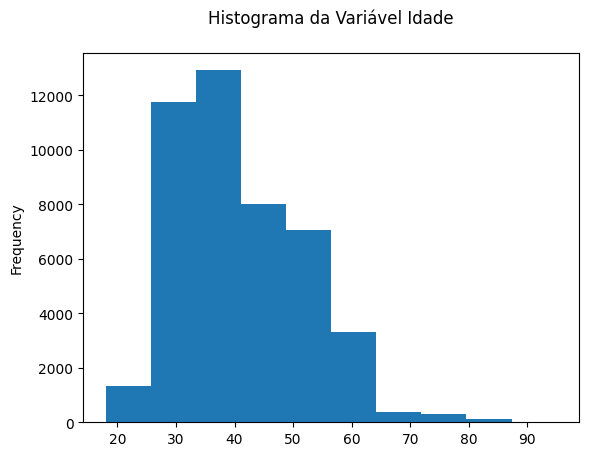

In [438]:
# Histograma
df.age.plot(kind = "hist")
plt.title("Histograma da Variável Idade\n")
plt.show()

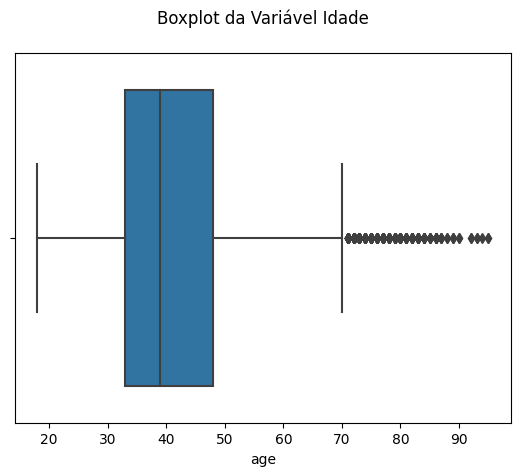

In [439]:
sns.boxplot(df.age)
plt.title("Boxplot da Variável Idade\n")
plt.show()

#Obs.: não posso usar a média, também, porque tenho outliers (a média sofre com estremos). Além da distribuição não ser simétrica.

In [440]:
# Vamos verificar qual é a média de idade.
df.age.mean()

40.93565090394105

In [441]:
# Vamos verificar qual é a mediana, valor do meio da distribuição quando os dados estão ordenados.
df.age.median()

39.0

In [442]:
# Vamos verificar qual é a moda, o valor que aparece com mais frequência.
df.age.mode()

0    32.0
dtype: float64

> Exercício 2: Vamos imputar os valores ausentes da variável age com uma medida de tendência central. Escolha uma das medidas, aplique a imputação e justifique sua escolha. Deixamos a variável como float ou como int? Se convertemos, fazemos isso antes ou depois da imputação?

In [443]:
# Minha proposta de solução
# Criando o índice
'''nan_index = df[df.age.isna()].index
nan_index'''

'nan_index = df[df.age.isna()].index\nnan_index'

In [444]:
# Imputando os valores ausentes com a moda, pois vemos que a distribuição não é normal, então não podemos imputar com a média. 
#Além disso a mediana não é uma boa opção porque vemos que é muito próxima da média e também sofre com outiliers. 
'''age_mode = statistics.mode(df.age)
df['age'][nan_index] = age_mode'''

"age_mode = statistics.mode(df.age)\ndf['age'][nan_index] = age_mode"

In [445]:
#Conversão da idade para inteiro e convertemos depois que imputamos porque assim modificamos menos os dados 
'''df['age'] = df['age'].astype('int')'''

"df['age'] = df['age'].astype('int')"

In [446]:
# Solução do professor 
# Vamos preencher com a moda pois são poucos valores ausentes e assim alteramos muito pouco o padrão nos dados.
df.age.fillna("32", inplace = True)

In [447]:
# Agora convertemos para int
df.age = df.age.astype("int")

In [448]:
# Tipo da variável
df.age.dtypes

dtype('int64')

In [449]:
# Média
df.age.mean()

40.93169803808808

In [450]:
# Mediana
df.age.median()

39.0

In [451]:
# Percentual de valores ausentes
df.age.isnull().mean()*100

0.0

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável que representa o mês.

In [452]:
# Valores ausentes no dataframe
df.isna().any()

age          False
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [453]:
# Valores ausentes na variável
df.month.isnull().sum()

50

In [454]:
# Percentual de valores ausentes
df.month.isnull().mean()*100 

0.11059255490920351

Como o percentual é menor que 30% não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 50 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

In [455]:
# Tipo da variável
df.month.dtypes

dtype('O')

In [456]:
# Categorias da variável
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

> Exercício 3: Vamos imputar os valores ausentes da variável month. Escolha uma estratégia e aplique no dataset.

In [457]:
# Minha proposta de solução 
# Vamos imputar a moda 
'''mode = statistics.mode(df.month)
df.month.fillna(mode, inplace=True)'''

# Outra forma de fazer 
# nan_index = df[df.month.isna()].index
#df['month'][nan_index] = mode 

'mode = statistics.mode(df.month)\ndf.month.fillna(mode, inplace=True)'

In [458]:
# Converter o tipo para datetime 
'''df.month = pd.to_datetime(df.month, format='%b, %Y').dt.to_period('M').dt.to_timestamp()'''


"df.month = pd.to_datetime(df.month, format='%b, %Y').dt.to_period('M').dt.to_timestamp()"

In [459]:
# Proposta de solução professor 
# Vamos imputar com a moda, o valor mais frequente da variável, pois são poucos registros
df.month.mode()


0    may, 2017
dtype: object

In [460]:
# Imputação com a moda
df.month.fillna("may, 2017", inplace = True)

In [461]:
# Valores ausentes tratados com sucesso
df.month.isnull().sum()

0

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável que representa o salário.

In [462]:
# Valores ausentes no dataframe
df.isna().any()

age          False
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [463]:
# Valores ausentes na variável
df.salary.isnull().sum()

26

In [464]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.05750812855278583

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 26 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

Mas espere. Vamos checar algo aqui.

In [465]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


Existe salário igual a zero? Não. O valor zero é provavelmente um outlier (confirmar com a área de negócio).

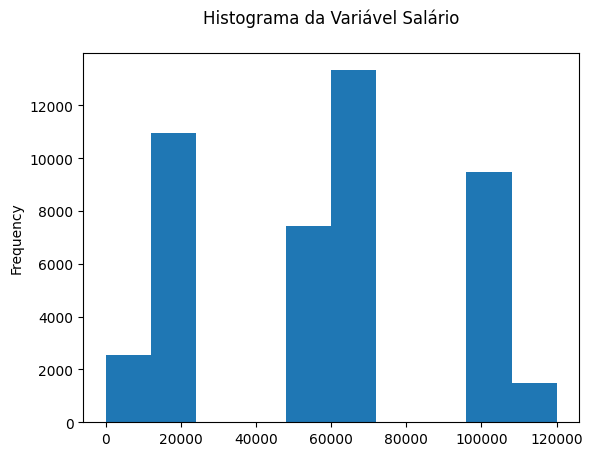

In [466]:
# Histograma
df.salary.plot(kind='hist')
plt.title('Histograma da Variável Salário\n')
plt.show()

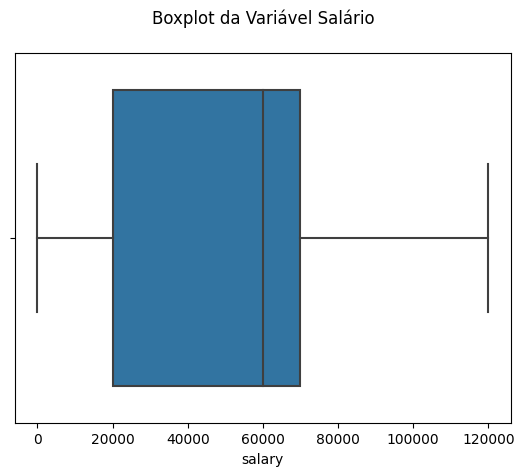

In [467]:
# Boxplot
sns.boxplot(df.salary)
plt.title('Boxplot da Variável Salário\n')
plt.show()

In [468]:
# Vamos verificar qual é a média de idade.
df.salary.mean()

57008.65331415293

In [469]:
# Vamos verificar qual é a mediana.
df.salary.median()

60000.0

In [470]:
# Vamos verificar qual é a moda.
df.salary.mode()

0    20000.0
dtype: float64

> Exercício 4: Vamos imputar os valores ausentes da variável salary com uma medida de tendência central. Precisamos também tratar os valores iguais a zero. Escolha sua estratégia, aplique a imputação e justifique sua escolha. 

In [471]:
# Minha proposta de solução
'''df.salary.fillna((df.salary.median()), inplace=True)'''

'df.salary.fillna((df.salary.median()), inplace=True)'

In [472]:
'''df.salary.isna().sum()'''

'df.salary.isna().sum()'

In [473]:
# Vamos preencher com a mediana pois os dados parecem assimétricos (nesse caso a média não pode ser usada) 
# e o valor mais frequente está muito abaixo da média e da mediana (por isso não usaremos a moda)
df.salary.fillna("60000", inplace = True)

In [474]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [ ]:
# Histograma (vai gerar erro)
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

In [475]:
# Tipo da variável
df.salary.dtypes

dtype('O')

In [476]:
# Convertemos para o tipo float
df.salary = df.salary.astype("float")

In [477]:
# Tipo da variável
df.salary.dtypes

dtype('float64')

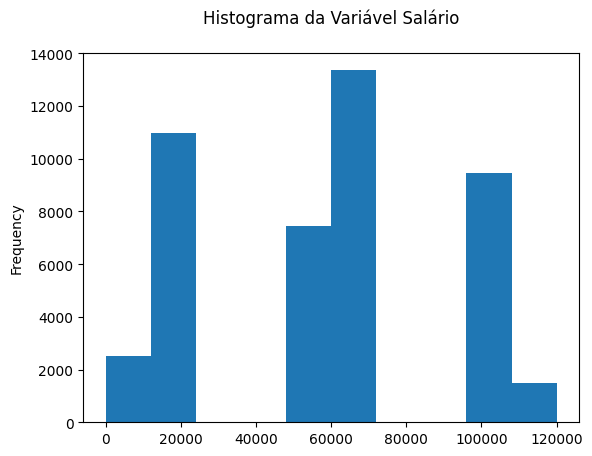

In [478]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

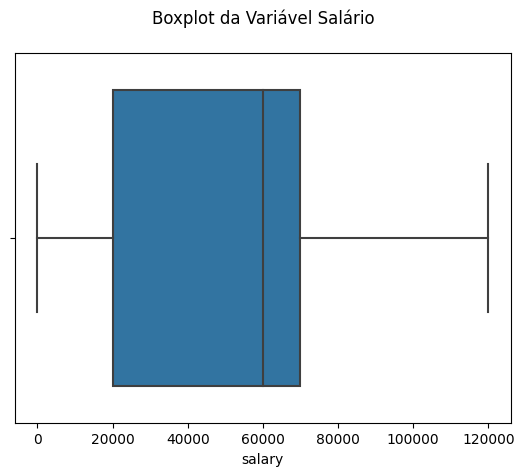

In [479]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [480]:
# Registros para cada salário
df.salary.value_counts()

20000.0     9725
100000.0    9454
60000.0     9195
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
Name: salary, dtype: int64

In [482]:
# Replace do zero pela mediana
df['salary'] = df['salary'].replace(0, df['salary'].median())

In [483]:
# Registros para cada salário
df.salary.value_counts()

20000.0     9725
60000.0     9483
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
Name: salary, dtype: int64

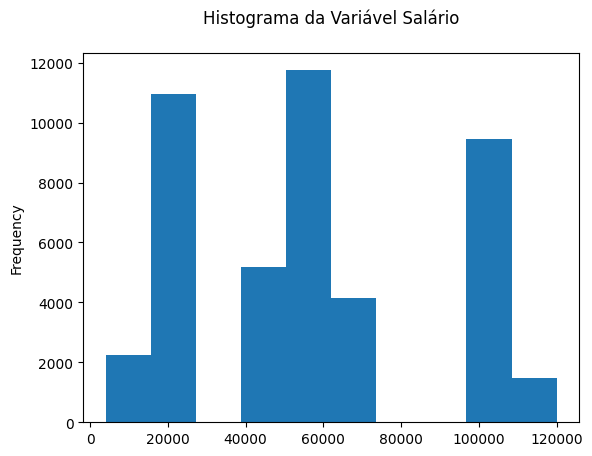

In [484]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

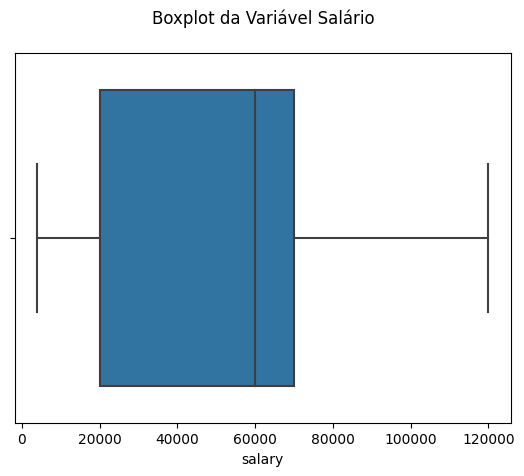

In [485]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [486]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.0

In [487]:
df.isna().any()

age          False
salary       False
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [488]:
## Tratamento de Valores Ausentes

> Vamos agora tratar a variável que representa a resposta (variável alvo).

In [490]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [491]:
# Valores ausentes
df.response.isnull().sum()

30

In [492]:
# Calcula o percentual
df.response.isnull().mean()*100

0.0663555329455221

Como o percentual é baixo (e a variável é o alvo da nossa análise) não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 30 linhas no dataset) ou podemos aplicar imputação.

> Exercício 5: Escolha sua estratégia, aplique e justifique sua escolha. 

In [493]:
# Não devemos aplicar imputação na variável de estudo (variável resposta ou variável alvo)
# Vamos dropar os registros
df.dropna(subset = ["response"], inplace = True)

In [494]:
# Verifca valores NA
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável pdays.

In [496]:
# Valores ausentes
df.pdays.isnull().sum()

0

In [497]:
# Describe
# O certo é fazer describe ou value_counts em todas as variáveis para ver se existe alguma ausencia de informação
df.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indica valor ausente


In [498]:
df.pdays = df.pdays.replace({-1.0: np.NaN})

In [499]:
# Valores ausentes
df.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        36930
previous         0
poutcome         0
response         0
job              0
education        0
dtype: int64

In [500]:
# Calcula o percentual
df.pdays.isnull().mean()*100

81.73789867422147

> Exercício 6: Escolha sua estratégia, aplique e justifique sua escolha. 

In [503]:
# Drop da coluna "pdays" pois tem mais de 30% dos valores ausentes
df.drop(columns=['pdays'], axis=1, inplace=True)

In [504]:
# Valores ausentes
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Conclusão e Análise dos Dados

### Análise Univariada

In [505]:
# Proporção da variável de estado civil
df.marital.value_counts(normalize=True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

In [506]:
df.marital.value_counts()

married     27195
single      12782
divorced     5204
Name: marital, dtype: int64

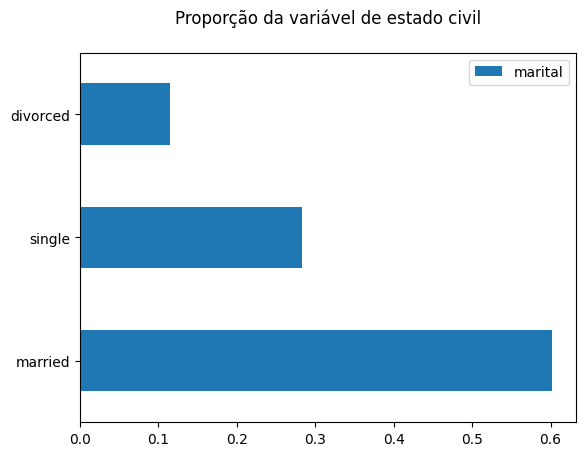

In [508]:
# Plot
df.marital.value_counts(normalize=True).plot(kind='barh')
plt.title('Proporção da variável de estado civil\n')
plt.legend()
plt.show()

In [525]:
# Fazendo com a plotly
fig = go.Figure()
fig.add_trace(go.Bar(y=df.marital.value_counts(normalize=True).index,
                     x=df.marital.value_counts(normalize=True),
                     orientation='h'
                     ))
fig.update_layout(title_text='Proporção da variável de estado civil\n', title_x = 0.5)

fig.show()


In [526]:
# Proporção da variável de job
df.job.value_counts(normalize=True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

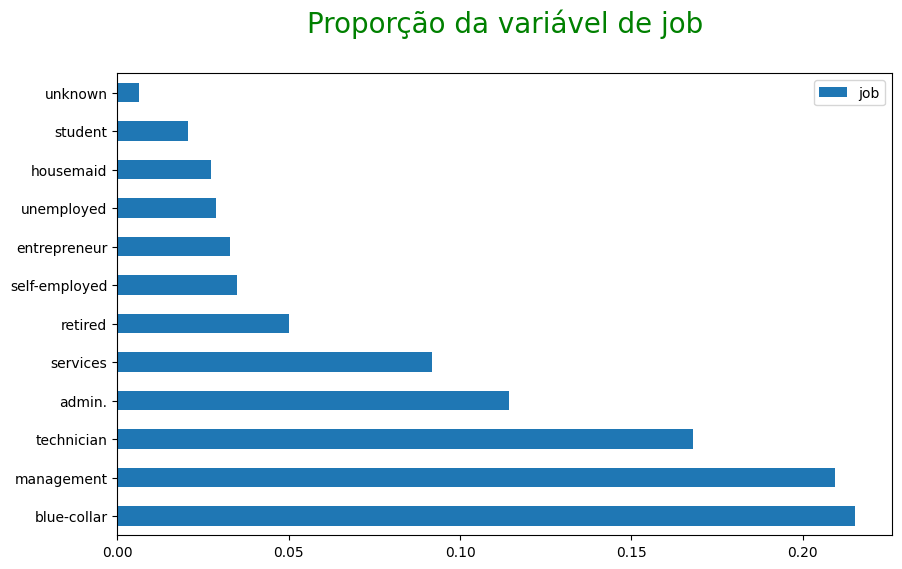

In [527]:
# Plot
plt.figure(figsize = (10,6))
df.job.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de job\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

In [528]:
# Proporção da variável de education
df.education.value_counts(normalize=True)

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: education, dtype: float64

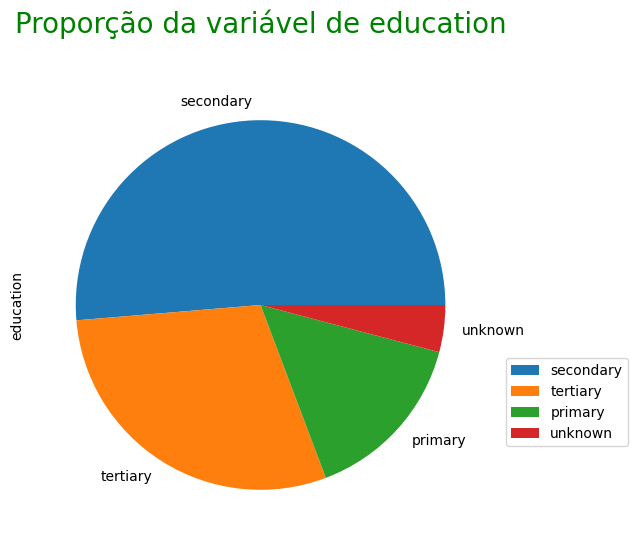

In [529]:
# Plot
plt.figure(figsize = (10,6))
df.education.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável de education\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

In [535]:
#Fazendo com a plotly 

fig = go.Figure()

fig.add_trace(go.Pie(labels= (df.education.value_counts(normalize=True)).index,
                     values = (df.education.value_counts(normalize=True)).values
))
fig.show()

In [536]:
# Proporção da variável response
df.response.value_counts(normalize = True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

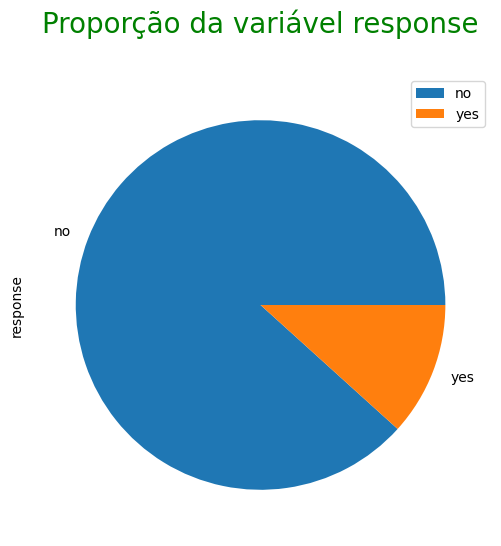

In [537]:
# Plot
plt.figure(figsize = (10,6))
df.response.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável response\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

## Análise Multivariada

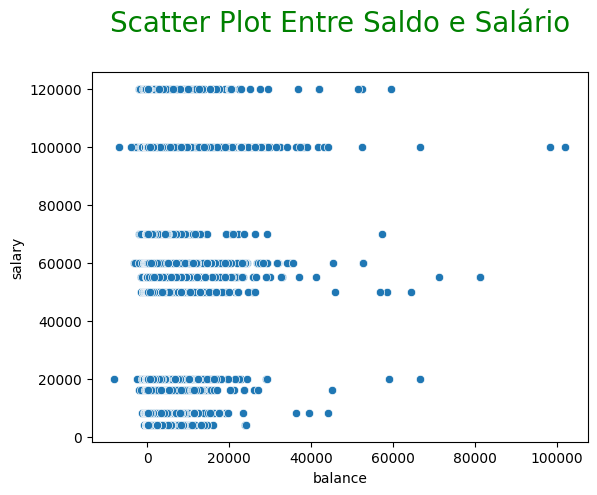

In [538]:
# Scatter Plot
sns.scatterplot(df["balance"], df["salary"])
plt.title("Scatter Plot Entre Saldo e Salário\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

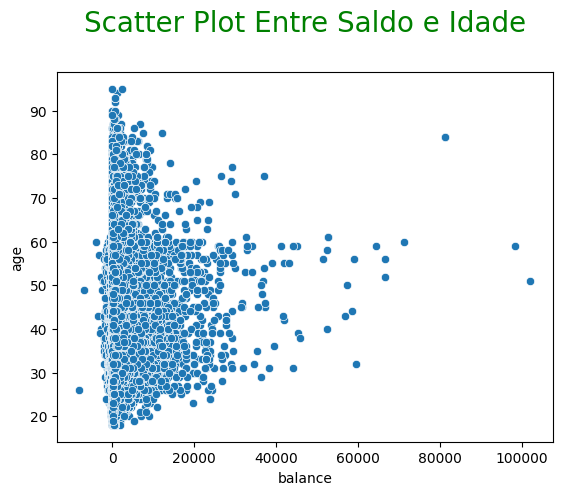

In [539]:
# Scatter Plot
sns.scatterplot(df["balance"], df["age"])
plt.title("Scatter Plot Entre Saldo e Idade\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

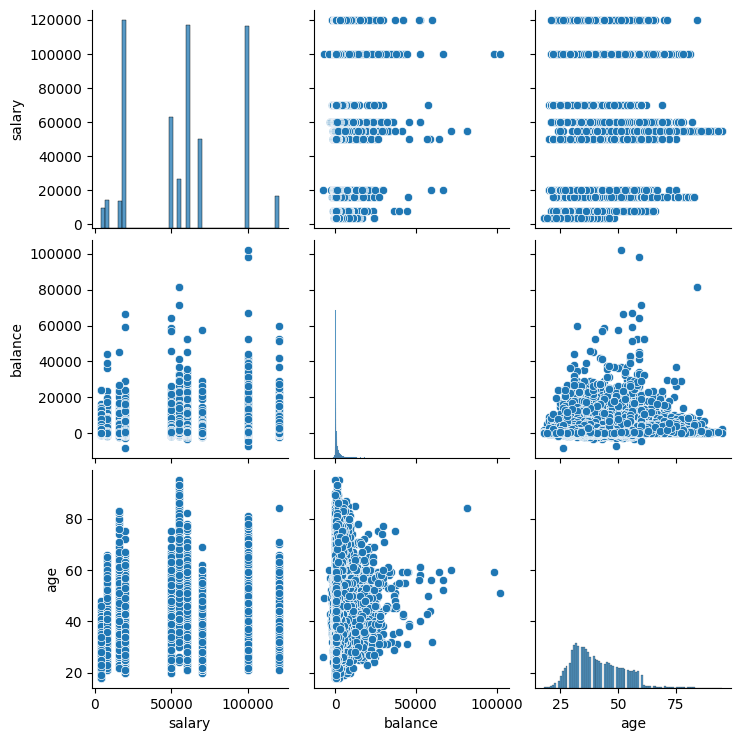

In [540]:
# Pair Plot
sns.pairplot(df[["salary","balance","age"]])
plt.show()

In [541]:
# Calcula a correlação
res = df[["salary", "balance", "age"]].corr()

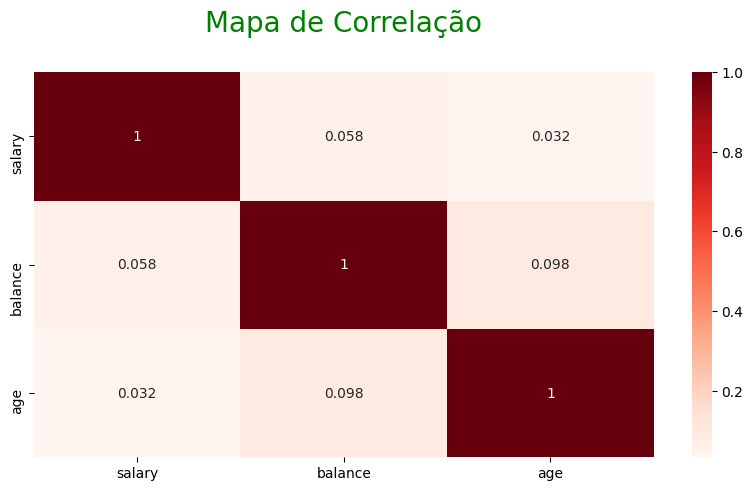

In [547]:
# Mapa de Correlação
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

### Numérico x Categórico

In [548]:
# Agrupa o salário pela variável resposta e calcula a média
df.groupby(by=['response'])['salary'].mean()

response
no     57157.692886
yes    59157.556270
Name: salary, dtype: float64

In [549]:
df.groupby(by=['response'])['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

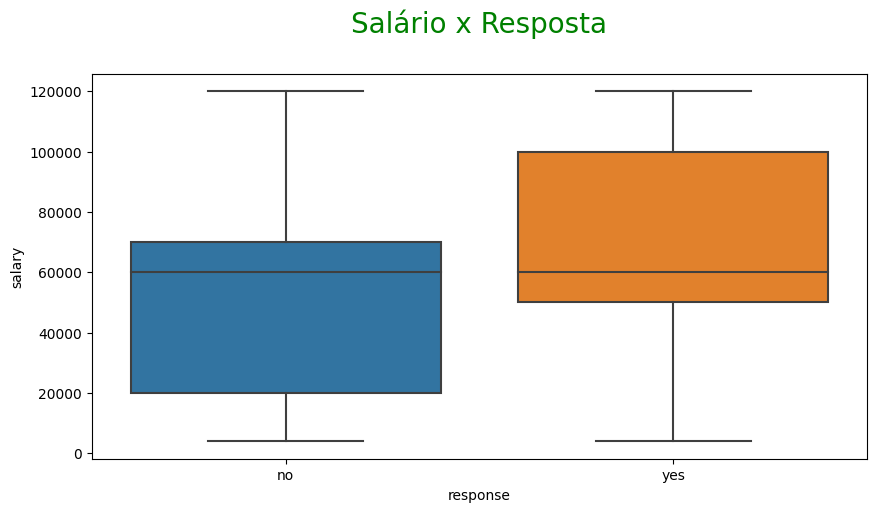

In [550]:
# Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(df["response"], df["salary"])
plt.title("Salário x Resposta\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [555]:
# Agrupa educação por salário e calcula a média
df.groupby(by = ["education"])["salary"].mean()

education
primary      34697.106955
secondary    49922.420113
tertiary     83041.077340
unknown      50708.512931
Name: salary, dtype: float64

In [557]:
# Cria a variável response_flag como tipo numérico onde response "yes"= 1, "no"= 0
df['response_flag'] = np.where(df['response'] == 'yes', 1, 0)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education,response_flag
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary,0
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary,0
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary,0
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown,0
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown,0


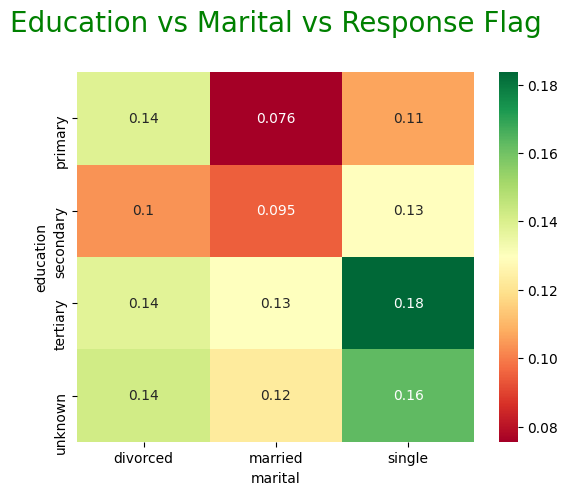

In [558]:
# Mapa de correlação
res1 = df.pivot_table(index = "education", columns = "marital", values = "response_flag", aggfunc = "mean")
sns.heatmap(res1, annot = True, cmap = "RdYlGn")
plt.title("Education vs Marital vs Response Flag\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [ ]:
#Fim 